# IMPORT  LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import OneHotEncoder

# IMPORT DATASETS

In [2]:
train = pd.read_csv('./Train_data.csv')
test = pd.read_csv('./test_data.csv')

# EXPLORATION

In [3]:
train.corr()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.201850,0.126152,0.094962,0.032513,-0.045155,0.166459,-0.000982,-0.155353,0.053480,...,-0.144596,0.047266,0.102640,-0.139997,-0.005195,-0.052142,-0.025573,-0.221046,0.222248,0.211177
Cholesterol,0.201850,1.000000,0.207664,0.014980,0.011045,0.121565,0.090864,-0.074678,-0.299422,0.147722,...,0.168469,0.013902,0.168118,0.146531,0.057961,0.155788,-0.154108,-0.021709,-0.071308,-0.211815
Hemoglobin,0.126152,0.207664,1.000000,0.121879,0.059539,0.052803,-0.016702,-0.130591,0.188262,0.052365,...,0.154553,0.052063,0.302901,-0.011438,0.020301,-0.095531,0.002655,-0.059247,-0.096180,-0.049385
Platelets,0.094962,0.014980,0.121879,1.000000,-0.081205,0.041547,-0.186816,0.131429,-0.079204,-0.015264,...,-0.242272,0.098628,-0.205245,-0.196438,-0.097731,0.081491,-0.096443,-0.020369,-0.014930,-0.020203
White Blood Cells,0.032513,0.011045,0.059539,-0.081205,1.000000,0.068023,0.249787,-0.011324,0.014312,-0.041609,...,0.090920,0.034506,-0.030755,-0.037955,0.032459,0.152566,0.198235,0.080568,-0.122723,0.021788
Red Blood Cells,-0.045155,0.121565,0.052803,0.041547,0.068023,1.000000,-0.084555,-0.154514,-0.020241,-0.123454,...,0.067237,0.148803,0.169262,0.252507,0.178947,-0.191404,0.036679,-0.110708,-0.104942,-0.175794
Hematocrit,0.166459,0.090864,-0.016702,-0.186816,0.249787,-0.084555,1.000000,0.055150,-0.099970,-0.025486,...,-0.112917,-0.027707,-0.033376,0.036883,-0.034960,-0.107572,-0.099788,-0.019058,0.198434,-0.079240
Mean Corpuscular Volume,-0.000982,-0.074678,-0.130591,0.131429,-0.011324,-0.154514,0.055150,1.000000,0.001776,0.141168,...,-0.143843,-0.064528,-0.197323,-0.097428,0.015310,-0.002724,-0.167693,-0.000606,0.137077,-0.101596
Mean Corpuscular Hemoglobin,-0.155353,-0.299422,0.188262,-0.079204,0.014312,-0.020241,-0.099970,0.001776,1.000000,-0.021991,...,0.065253,-0.150571,0.180734,-0.014948,-0.101612,0.087612,0.043941,-0.162132,-0.213429,0.066459
Mean Corpuscular Hemoglobin Concentration,0.053480,0.147722,0.052365,-0.015264,-0.041609,-0.123454,-0.025486,0.141168,-0.021991,1.000000,...,0.159302,0.156547,0.146897,-0.093480,-0.222864,0.049895,-0.075725,0.067239,0.090829,0.043567


In [4]:
test.corr()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,...,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,...,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,...,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,...,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,...,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,...,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,...,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,...,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,...,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,...,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146


In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


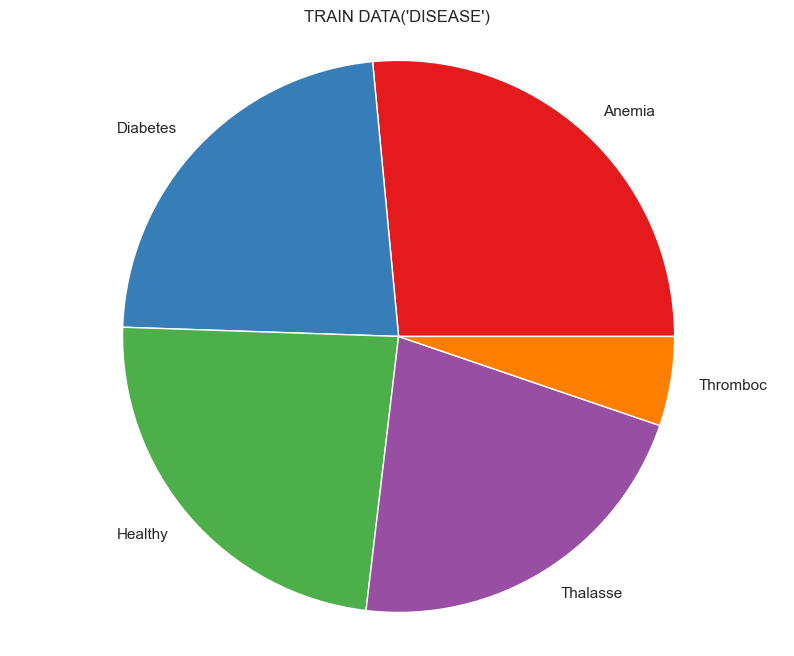

In [7]:
total = train.groupby('Disease').count().reset_index()
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.set_palette('Set1')
plt.pie('Glucose' , radius = 1 , labels ='Disease' , data = total)
plt.axis("equal")
plt.title("TRAIN DATA('DISEASE')")
plt.show()

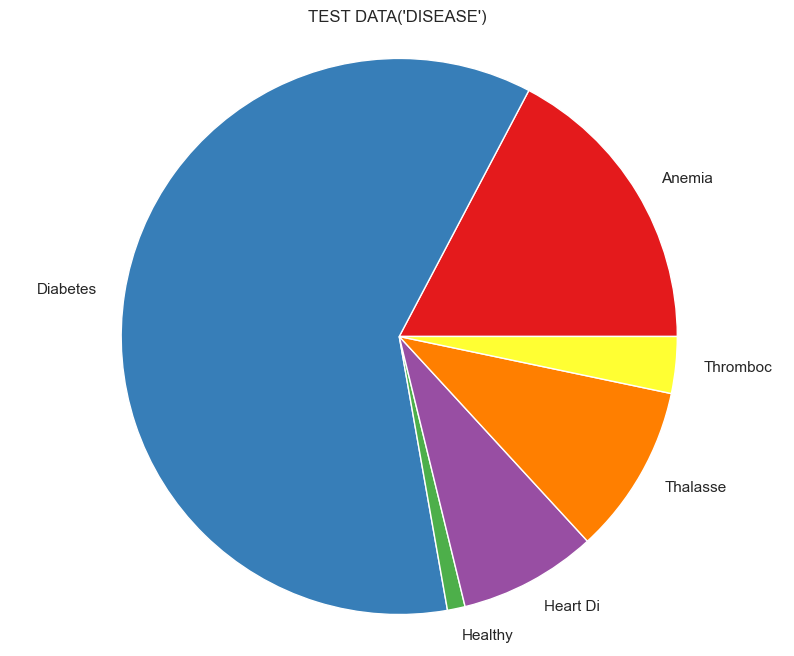

In [8]:
total = test.groupby('Disease').count().reset_index()
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.set_palette('Set1')
plt.pie('Glucose' , radius = 1 , labels ='Disease' , data = total)
plt.axis("equal")
plt.title("TEST DATA('DISEASE')")
plt.show()

In [9]:
train['Disease'].value_counts()

Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: Disease, dtype: int64

In [10]:
test['Disease'].value_counts()

Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: Disease, dtype: int64

# CLEANING

In [11]:
test = test[~(test['Disease']=='Heart Di')]

In [12]:
test = test[['Glucose', 'Cholesterol', 'Hemoglobin','Platelets','Hematocrit', 'White Blood Cells',
        'Insulin', 'BMI','Systolic Blood Pressure','Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c','ALT','AST','Heart Rate', 'Creatinine','Troponin','Disease']]

In [13]:
train = train[['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
        'Hematocrit', 'White Blood Cells','Insulin', 'BMI','Systolic Blood Pressure', 'Diastolic Blood Pressure', 
        'Triglycerides','HbA1c','ALT', 'AST','Heart Rate', 'Creatinine', 'Troponin', 'Disease']]

# SPLITING

In [14]:
X_train = train.drop('Disease',axis=1)
X_test = test.drop('Disease',axis=1)
y_train = train['Disease']
y_test = test['Disease']

# TRAIN MODEL 

In [15]:
model = GaussianNB(priors = [0.6, 0.2, 0.1, 0.06, 0.04])
model.fit(X_train, y_train)

GaussianNB(priors=[0.6, 0.2, 0.1, 0.06, 0.04])

# PREDICTION

In [16]:
pred = model.predict(X_test)
pred

array(['Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Anemia',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Anemia', 'Healthy', 'Diabetes', 'Diabetes', 'Diabetes', 'Anemia',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Healthy',
       'Diabetes', 'Diabetes', 'Anemia', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Anemia', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Anemia', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Thalasse', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Anemia', 'Diabetes', 'Diabetes', 'Diabetes',
       'Diabetes', 'Thalasse', 'Anemia', 'Diabetes', 'Diabetes',
       'Diabetes', 'Healthy', 'Anemia', 'Diabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Healthy', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
     

In [17]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

      Anemia       0.47      0.44      0.45        84
    Diabetes       0.75      0.85      0.80       294
     Healthy       0.03      0.20      0.06         5
    Thalasse       0.00      0.00      0.00        48
    Thromboc       0.00      0.00      0.00        16

    accuracy                           0.64       447
   macro avg       0.25      0.30      0.26       447
weighted avg       0.58      0.64      0.61       447



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(accuracy_score(y_test, pred))

0.6420581655480985


In [21]:
print(confusion_matrix(y_test, pred))

[[ 37  44   2   1   0]
 [ 29 249  11   5   0]
 [  0   2   1   2   0]
 [  9  26  13   0   0]
 [  4   9   2   1   0]]
